In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
BASE_DIR = os.getcwd()

DATASETS_DIR = os.path.join(BASE_DIR, "..", "datasets")

csv_path = os.path.join(DATASETS_DIR, "housing.csv")

data = pd.read_csv(csv_path)

In [27]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [30]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
train_data = X_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4510,-118.19,34.04,45.0,963.0,234.0,1194.0,239.0,2.1806,<1H OCEAN,134900.0
4826,-118.31,34.03,29.0,2438.0,867.0,2114.0,753.0,0.8351,<1H OCEAN,150000.0
5052,-118.34,34.01,37.0,4291.0,1102.0,1941.0,953.0,1.7945,<1H OCEAN,106300.0
19675,-121.62,39.16,7.0,4480.0,776.0,2271.0,767.0,3.8090,INLAND,110700.0
345,-122.18,37.75,36.0,1047.0,214.0,651.0,166.0,1.7120,NEAR BAY,82100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

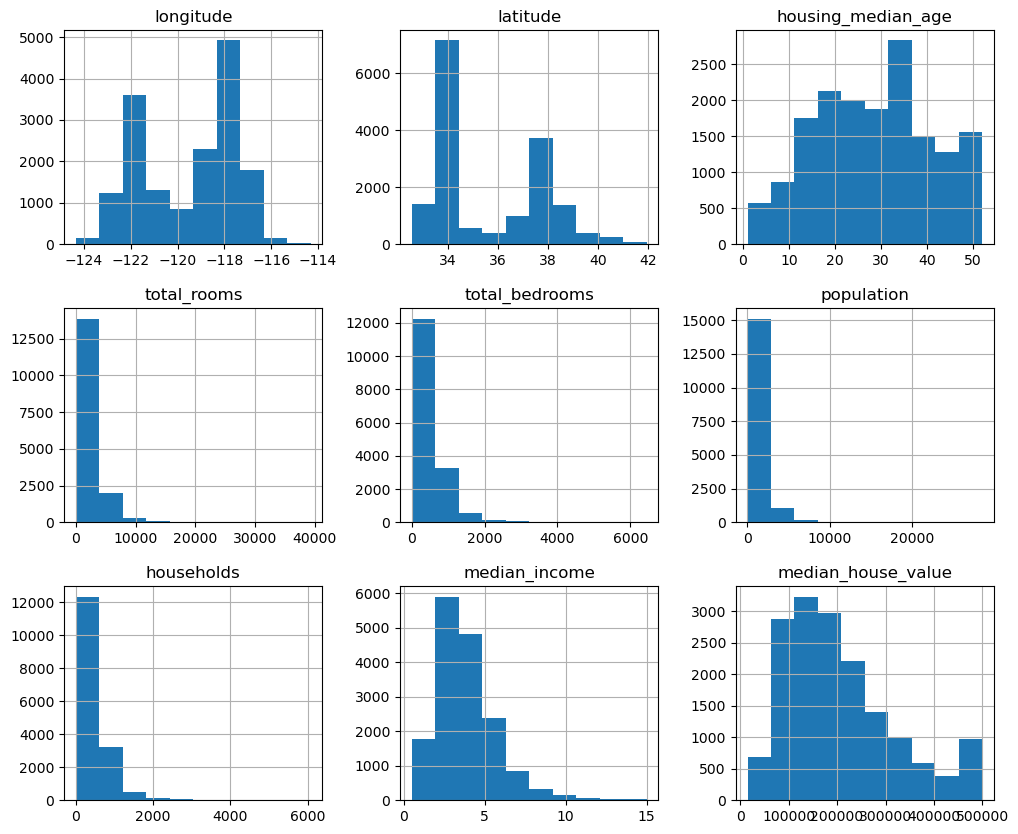

In [34]:
train_data.hist(figsize=(12, 10))

In [35]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.568195,35.629006,28.640585,2645.136302,539.354705,1425.993148,500.841857,3.868037,206879.324728
std,2.006593,2.139873,12.569643,2205.631452,422.342782,1116.650572,382.407364,1.880599,115285.152481
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,789.000000,280.000000,2.566300,119400.000000
50%,-118.490000,34.250000,29.000000,2131.000000,435.000000,1167.000000,410.000000,3.539200,180000.000000
75%,-118.010000,37.720000,37.000000,3148.750000,646.000000,1723.000000,603.000000,4.743425,264900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


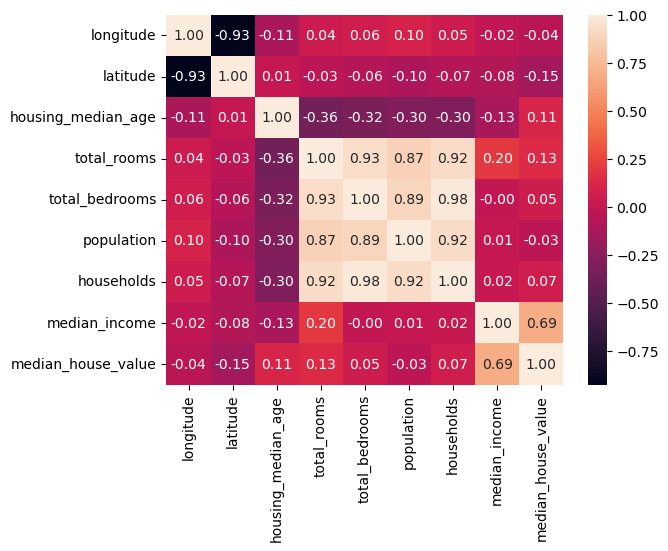

In [36]:
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

In [37]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [38]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7218
INLAND        5202
NEAR OCEAN    2115
NEAR BAY      1807
ISLAND           4
Name: count, dtype: int64

In [39]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop("ocean_proximity", axis=1)

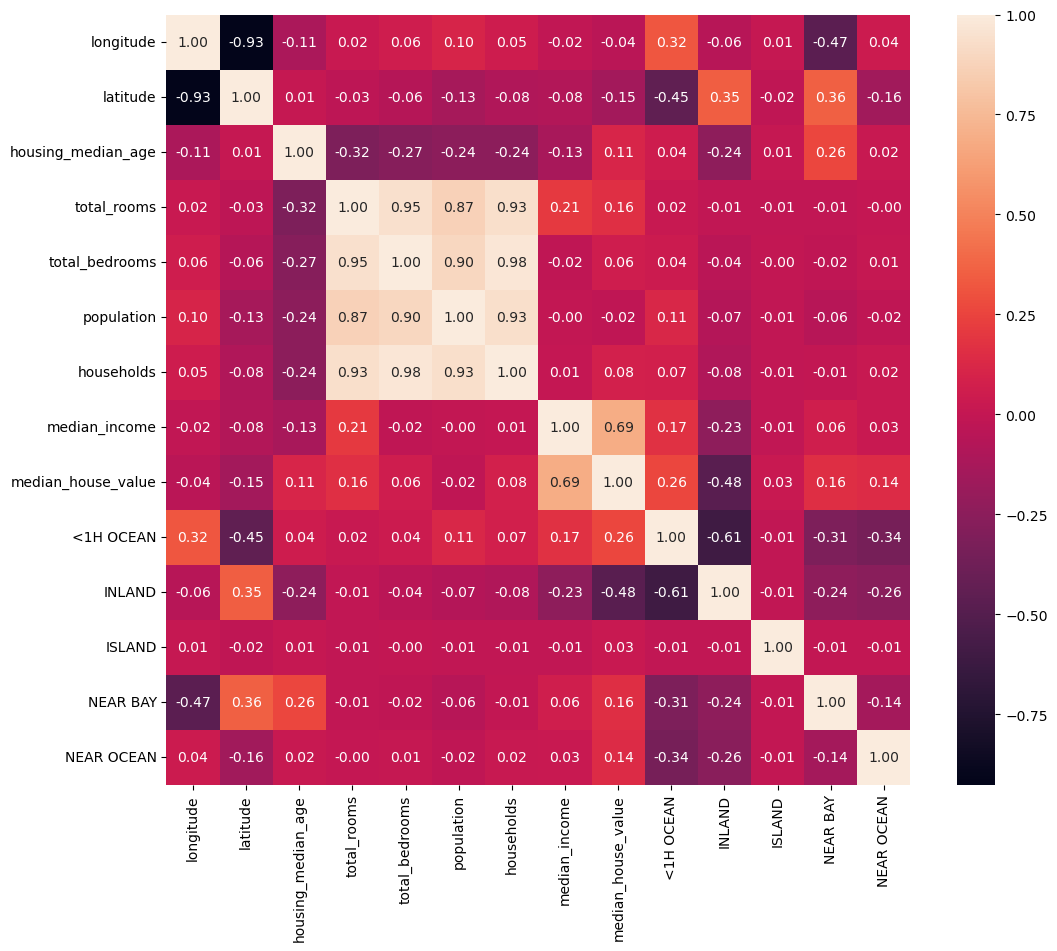

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

In [41]:
train_data.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686519
<1H OCEAN             0.257288
total_rooms           0.160641
NEAR BAY              0.157442
NEAR OCEAN            0.139442
housing_median_age    0.105433
households            0.075432
total_bedrooms        0.057184
ISLAND                0.026283
population           -0.021729
longitude            -0.041259
latitude             -0.146312
INLAND               -0.481637
Name: median_house_value, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

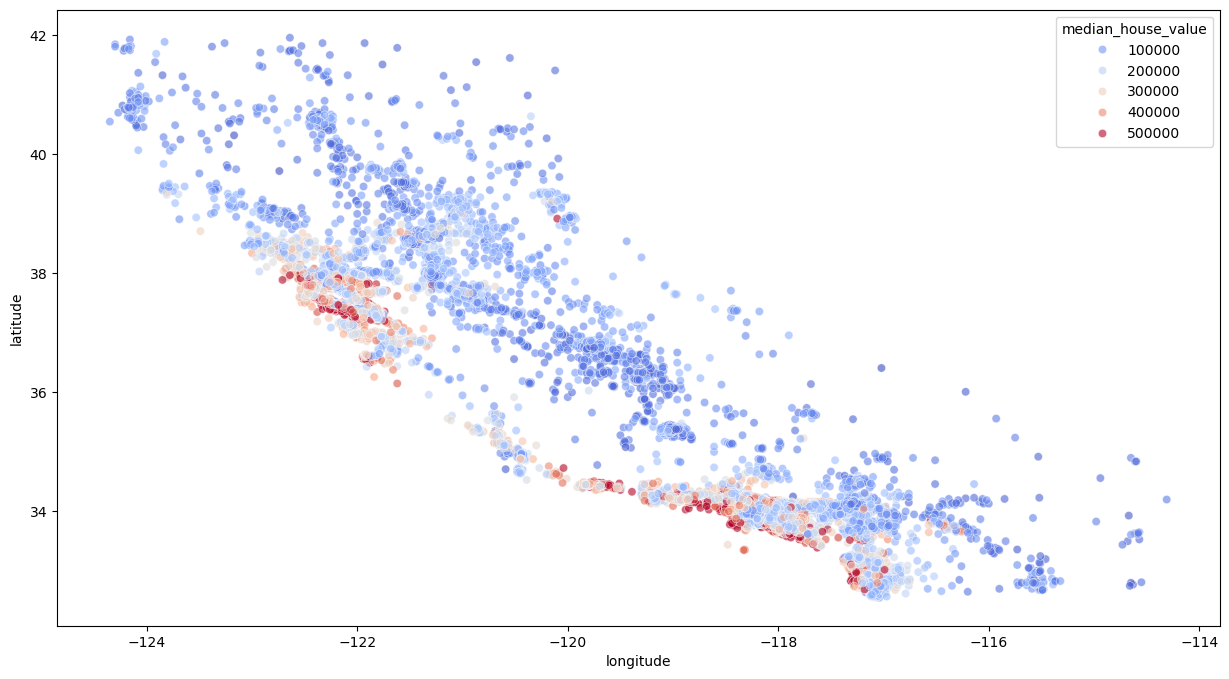

In [42]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.6)

In [43]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_room'] = train_data['total_rooms'] / train_data['households']

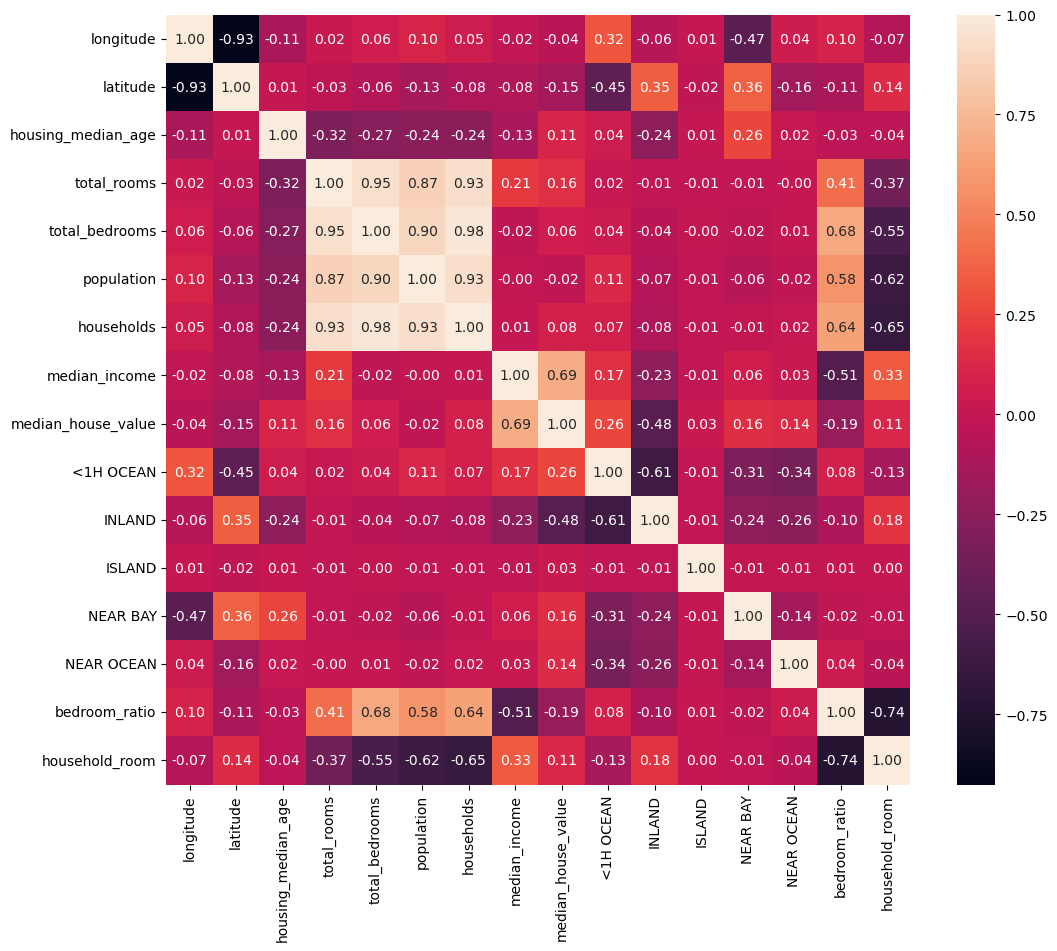

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

In [45]:
train_data.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686519
<1H OCEAN             0.257288
total_rooms           0.160641
NEAR BAY              0.157442
NEAR OCEAN            0.139442
household_room        0.112607
housing_median_age    0.105433
households            0.075432
total_bedrooms        0.057184
ISLAND                0.026283
population           -0.021729
longitude            -0.041259
latitude             -0.146312
bedroom_ratio        -0.194214
INLAND               -0.481637
Name: median_house_value, dtype: float64

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop("median_house_value", axis=1), train_data["median_house_value"]

X_train_s=scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop("ocean_proximity", axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_room'] = test_data['total_rooms'] / test_data['households']



In [48]:
x_test, y_test = test_data.drop("median_house_value", axis=1), test_data["median_house_value"]

In [49]:
X_test_s = scaler.transform(x_test)

In [50]:
reg.score(X_test_s, y_test)

0.6655093920935284

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
forest.score(X_test_s, y_test)

0.8209746239472735

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50,100],
    'max_features': [2,4],
    'max_depth': [None, 4, 8],
}

grid_search = GridSearchCV(forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_s, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 4, ...], 'max_features': [2, 4], 'n_estimators': [50, 100]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [55]:
best_forest = grid_search.best_estimator_

In [56]:
best_forest.score(X_test_s, y_test)

0.817095601772424